Opening raw data file record\best_recording\best_recording0.fif...
    Range : 0 ... 30998 =      0.000 ...   123.992 secs
Ready.
Reading 0 ... 30998  =      0.000 ...   123.992 secs...
Opening raw data file record\best_recording\best_recording1.fif...
    Range : 0 ... 29496 =      0.000 ...   117.984 secs
Ready.
Reading 0 ... 29496  =      0.000 ...   117.984 secs...
Opening raw data file record\best_recording\best_recording2.fif...
    Range : 0 ... 29481 =      0.000 ...   117.924 secs
Ready.
Reading 0 ... 29481  =      0.000 ...   117.924 secs...
Opening raw data file record\best_recording\best_recording3.fif...
    Range : 0 ... 29516 =      0.000 ...   118.064 secs
Ready.
Reading 0 ... 29516  =      0.000 ...   118.064 secs...
Opening raw data file record\best_recording\best_recording4.fif...
    Range : 0 ... 29494 =      0.000 ...   117.976 secs
Ready.
Reading 0 ... 29494  =      0.000 ...   117.976 secs...
Effective window size : 1.024 (s)


C:\Users\Sunsun\AppData\Local\Temp\ipykernel_9328\1911076013.py:12: RuntimeWarning: This filename (record\best_recording\best_recording0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(fname, preload = True))
C:\Users\Sunsun\AppData\Local\Temp\ipykernel_9328\1911076013.py:12: RuntimeWarning: This filename (record\best_recording\best_recording1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raws.append(mne.io.read_raw_fif(fname, preload = True))
C:\Users\Sunsun\AppData\Local\Temp\ipykernel_9328\1911076013.py:12: RuntimeWarning: This filename (record\best_recording\best_recording2.fif) does

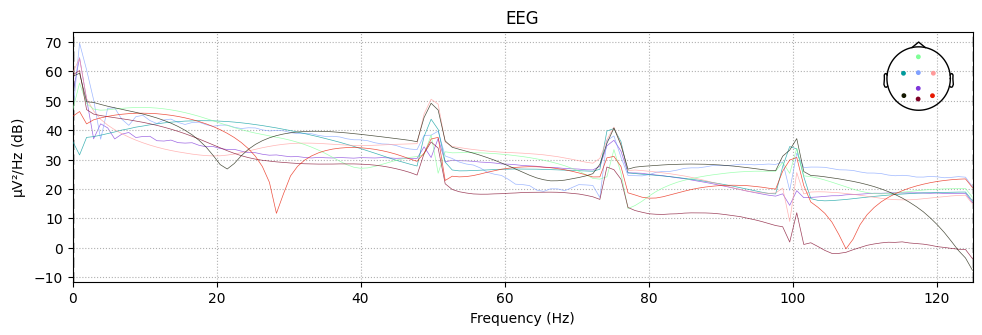

In [293]:
import mne
from scipy.signal import hilbert

# fname = "record\\best_recording\\best_recording3.fif"
# fname = "record\sunsun\sunsun0.fif"
# raw = mne.io.read_raw_fif(fname, preload = True)
# raw.compute_psd().plot()

raws = []
for i in range(5):
    fname = "record\\best_recording\\best_recording" + str(i) + ".fif"
    raws.append(mne.io.read_raw_fif(fname, preload = True))

raw = mne.concatenate_raws(raws)
raw.compute_psd().plot()

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
e:\Thesis\hybrid-ssvep-p300-speller\hybridspeller\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


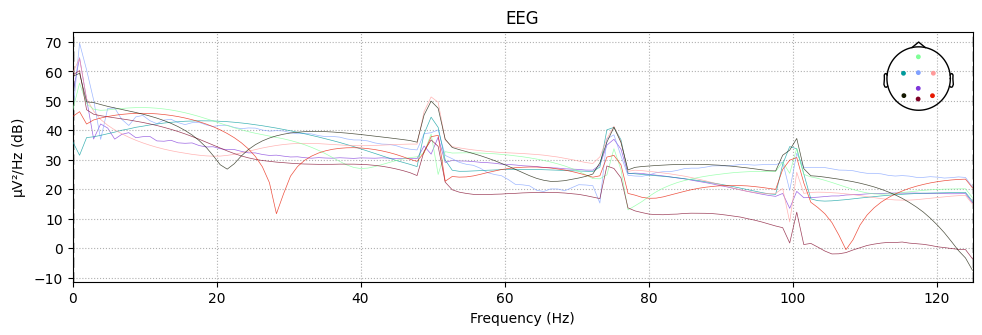

In [294]:
import numpy as np

raw.notch_filter([50, 75, 100], filter_length='auto', phase='zero')
raw.compute_psd().plot()

Filtering raw data in 5 contiguous segments
Setting up band-pass filter from 1 - 10 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 10.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)


e:\Thesis\hybrid-ssvep-p300-speller\hybridspeller\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


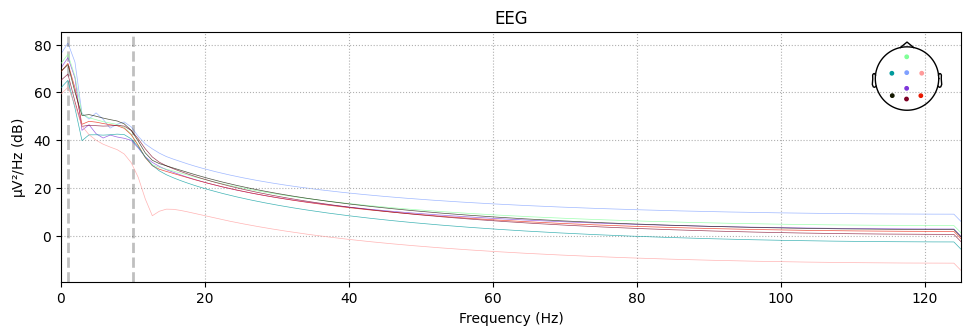

In [295]:
raw_p300 = raw.copy().filter(1, 10, method='iir')
raw_p300.compute_psd().plot()

Filtering raw data in 5 contiguous segments
Setting up band-pass filter from 11 - 17 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 11.00, 17.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)


e:\Thesis\hybrid-ssvep-p300-speller\hybridspeller\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


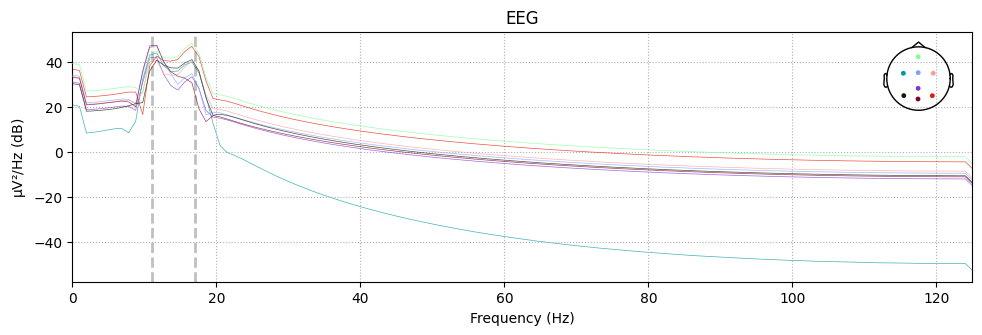

In [296]:
raw_ssvep = raw.copy().filter(11, 17, method='iir')
raw_ssvep.compute_psd().plot()

In [297]:
import numpy as np
np.unique(raw_p300.get_data()[8])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 99.])

In [298]:
events = mne.find_events(raw)
events = events[events[:,2] != 99 ]
epochs = mne.Epochs(raw=raw,events=events, baseline=None, tmin=-0.2, tmax=2.0, reject=None, reject_by_annotation=False)

450 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 99]
Not setting metadata
225 matching events found
No baseline correction applied
0 projection items activated


In [299]:
events = mne.find_events(raw_p300)
events = events[events[:,2] != 99 ]
epochs = mne.Epochs(raw=raw_p300,events=events, baseline=None, tmin=-0.2, tmax=2.0, reject=None, reject_by_annotation=False)

450 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 99]
Not setting metadata
225 matching events found
No baseline correction applied
0 projection items activated


In [300]:
epochs['1'].get_data().shape

Using data from preloaded Raw for 5 events and 551 original time points ...
0 bad epochs dropped


(5, 9, 551)

In [301]:
raw.info.ch_names

['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']

In [302]:
epochs.events[:,2]

array([24, 41, 32, 36, 26,  7, 42, 33,  4, 15, 12, 28, 23, 45, 21, 11,  5,
       34, 37, 31, 25, 19, 17, 14, 27, 40, 16, 18,  8, 44, 30, 22,  1, 29,
        3, 43, 13, 38, 39, 35, 10,  2,  9,  6, 20,  8, 22, 24,  1, 20, 27,
        7,  5, 15, 40, 30, 42, 28,  3, 44, 29,  6, 41, 14, 37, 13, 38, 35,
       21, 32, 26, 17,  4, 31, 33, 16, 23, 34,  9, 19,  2, 10, 12, 18, 43,
       25, 36, 45, 39, 11,  7,  6, 12, 23, 29, 11, 42, 36, 31, 16,  4, 19,
       45, 33, 26, 25, 17, 41, 43, 15,  1, 24, 10,  2, 28, 18, 30, 44,  8,
       27,  3,  9, 40, 38, 39, 13, 21, 34,  5, 32, 37, 20, 14, 22, 35, 20,
        7, 39, 43,  5, 33, 10, 34, 15, 45, 40, 17, 36,  4,  3, 42, 18, 24,
       21, 32, 22,  8, 12, 23, 31,  6, 11, 41, 14, 27,  9, 30, 16, 13, 26,
       19, 28, 44, 25, 38, 29,  1, 37,  2, 35, 10,  5, 29, 23, 30, 28, 11,
       40,  1, 41, 19, 39,  6, 32, 34, 31, 36, 24,  9, 42, 21, 22, 20, 45,
       38, 15,  7,  8, 26,  3, 44, 25, 33, 37, 12, 18,  2, 13, 43, 16, 27,
        4, 35, 14, 17], d

Using data from preloaded Raw for 225 events and 551 original time points ...
0 bad epochs dropped


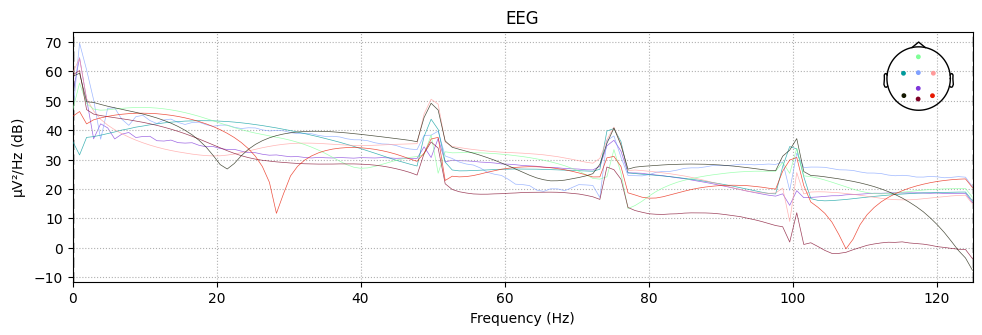

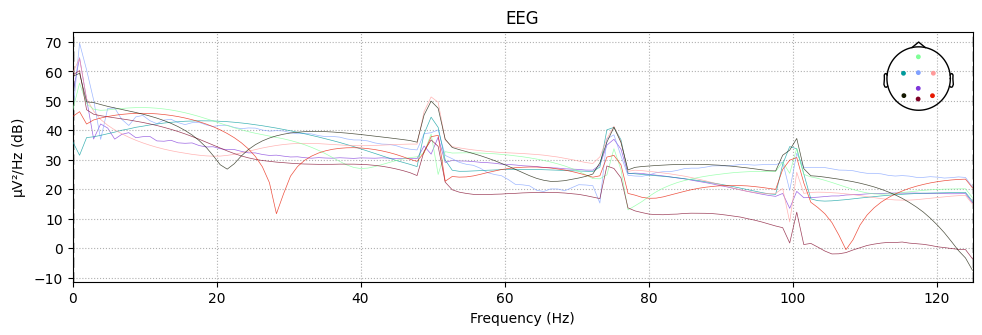

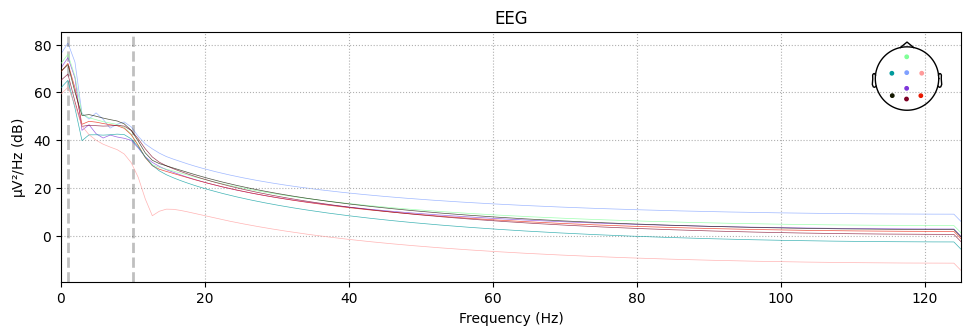

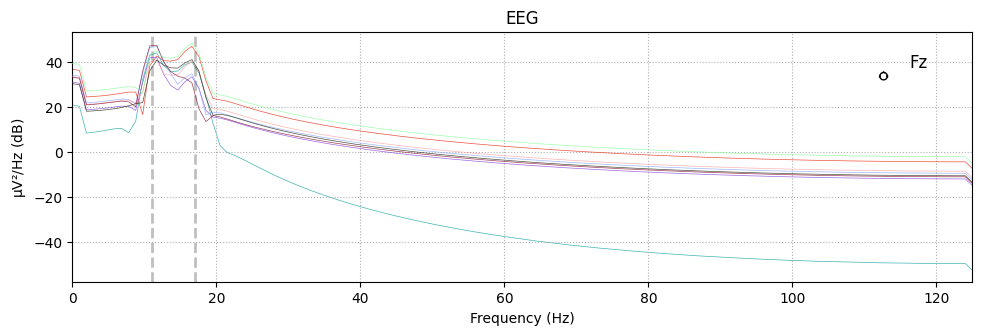

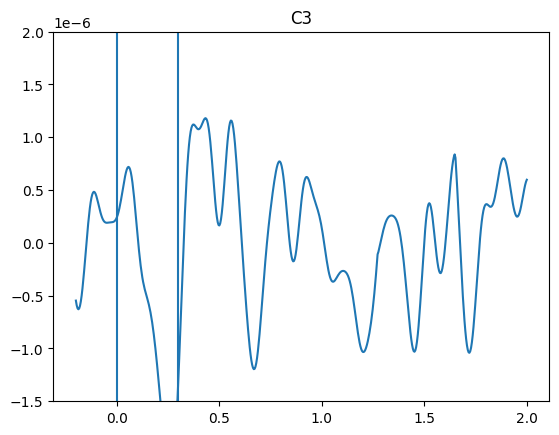

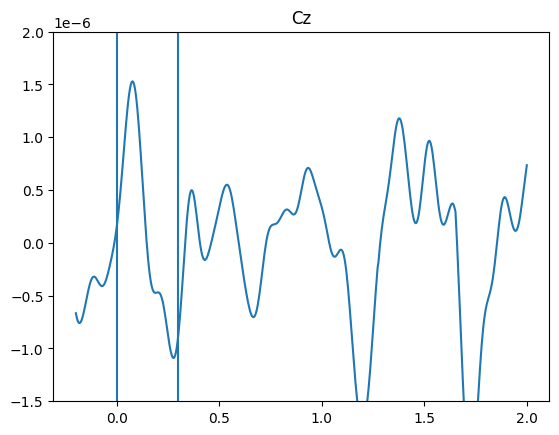

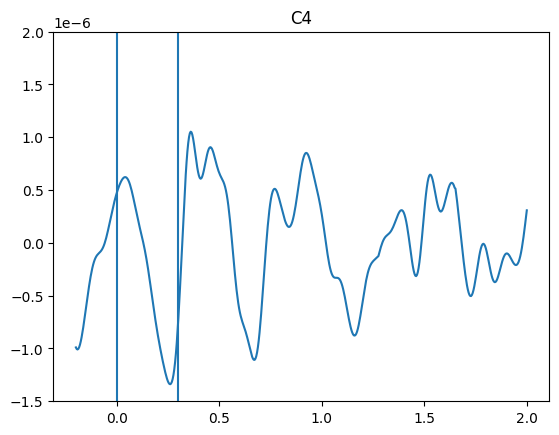

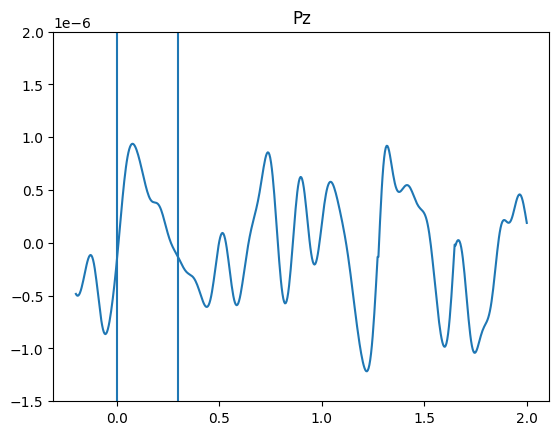

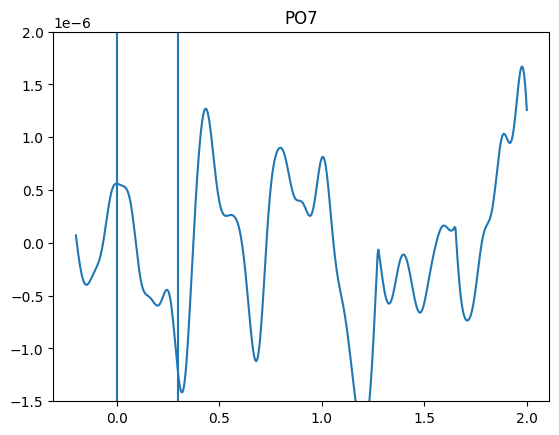

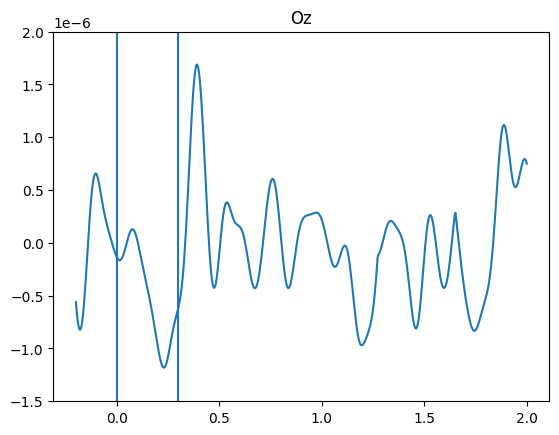

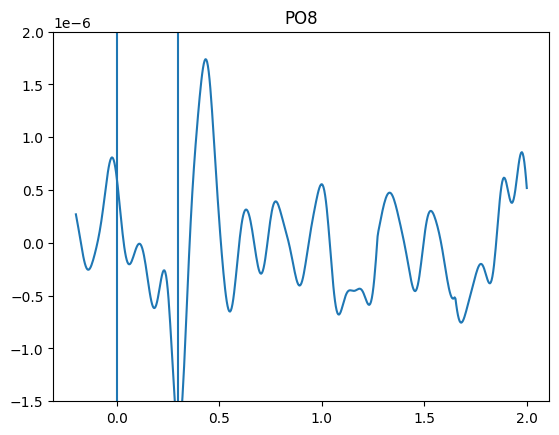

In [303]:
import matplotlib.pyplot as plt
signals = epochs.get_data().mean(axis=0)
signals.shape

for idx, i in enumerate(signals[:-1]):
    plt.plot(np.linspace(-0.2, 2, 551), i)
    plt.title(f"{raw.info.ch_names[idx]}")
    plt.axvline(x=0)
    plt.axvline(x=0.3)
    plt.ylim([-1.5e-6, 2e-6])
    # plt.xlabel(np.linspace(-0.2, 2, 551))
    plt.show()

Using data from preloaded Raw for 5 events and 551 original time points ...


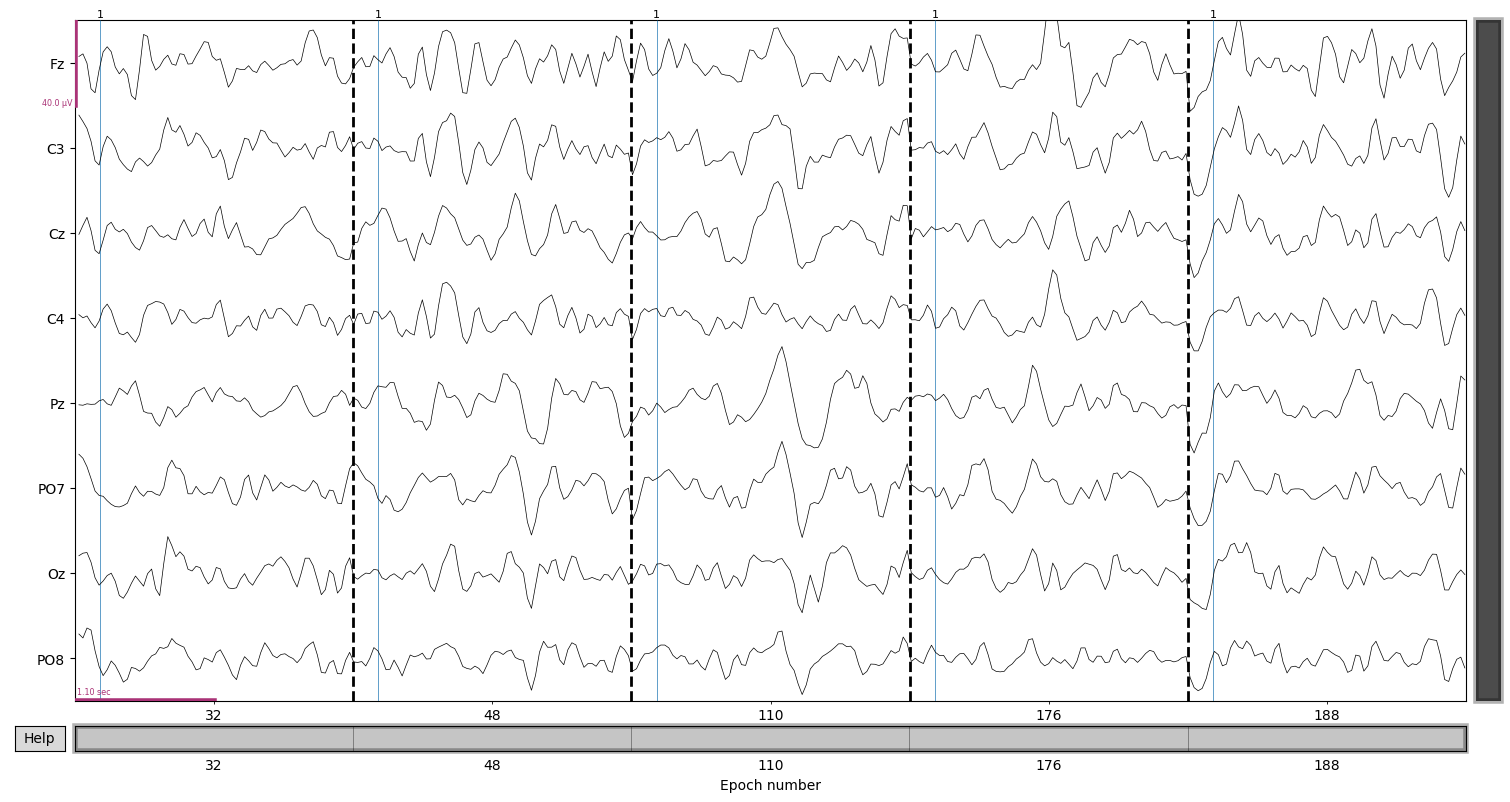

In [304]:
# plotting only events 1 and 2

event_1_2 = mne.pick_events(events, include=[1, 2])

_ = epochs['1'].plot(events=event_1_2)

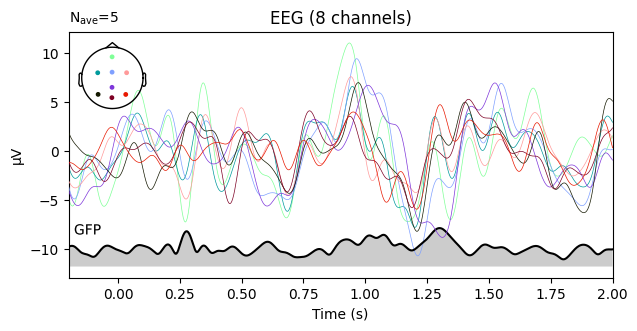

In [305]:
epochs_event1 = epochs['1'].average()
_ = epochs_event1.plot(spatial_colors=True, gfp=True, time_unit='s')


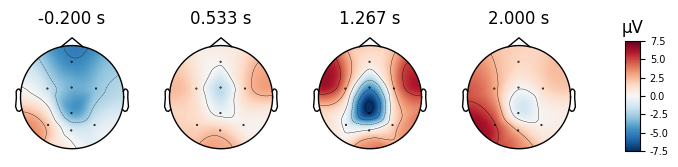

In [306]:
_ = epochs_event1.plot_topomap(ch_type='eeg', colorbar=True)

Using data from preloaded Raw for 5 events and 551 original time points ...
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


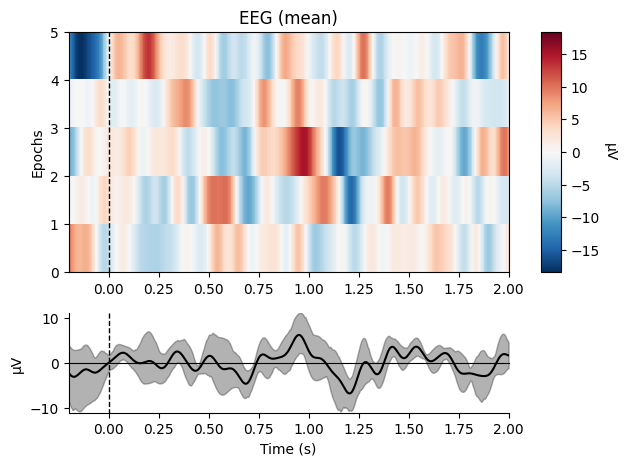

[<Figure size 640x480 with 3 Axes>]

In [307]:
epochs['1'].plot_image(picks='eeg', combine='mean')

In [308]:
events_ssvep = mne.find_events(raw_ssvep)
events_ssvep = events_ssvep[events_ssvep[:,2] != 99]
epochs_ssvep = mne.Epochs(raw=raw_ssvep,events=events_ssvep, baseline=None, tmin=-0.2, tmax=2.0, reject=None, reject_by_annotation=False)

450 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 99]
Not setting metadata
225 matching events found
No baseline correction applied
0 projection items activated


In [309]:
type(epochs_ssvep)

mne.epochs.Epochs

In [310]:
ar = np.linspace(-0.2, 2, 551)
print(len(ar))

551


In [311]:
import matplotlib.pyplot as plt
from  scipy.signal import hilbert
grand_average = mne.grand_average([epochs_ssvep.average()])
signals = grand_average.get_data()
signals.shape

Identifying common channels ...


C:\Users\Sunsun\AppData\Local\Temp\ipykernel_9328\3600984458.py:3: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average = mne.grand_average([epochs_ssvep.average()])


(8, 551)

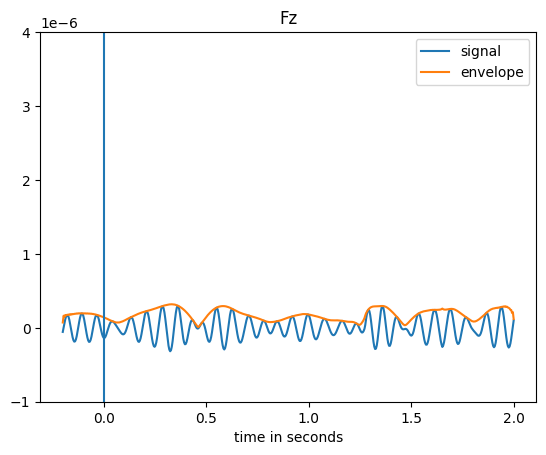

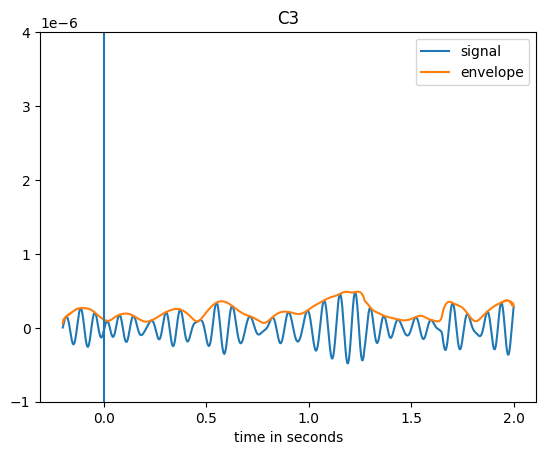

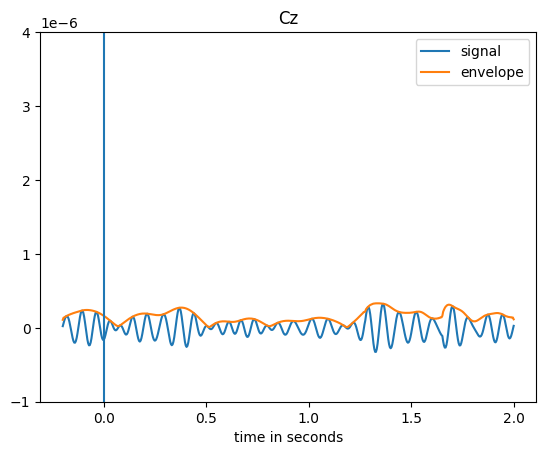

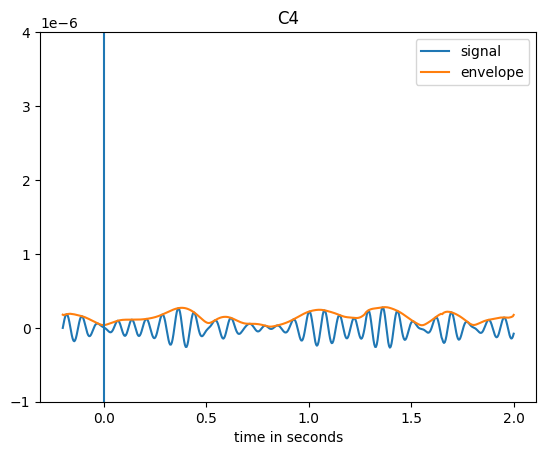

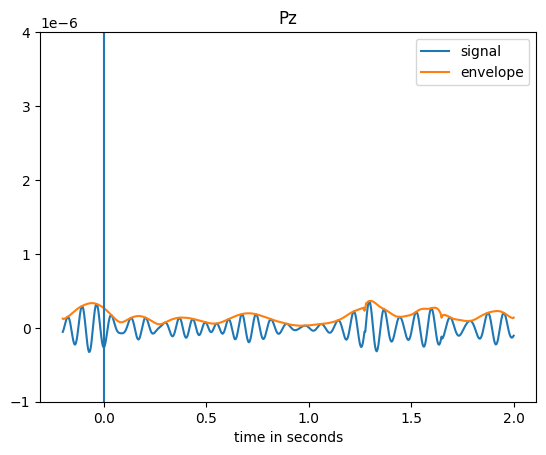

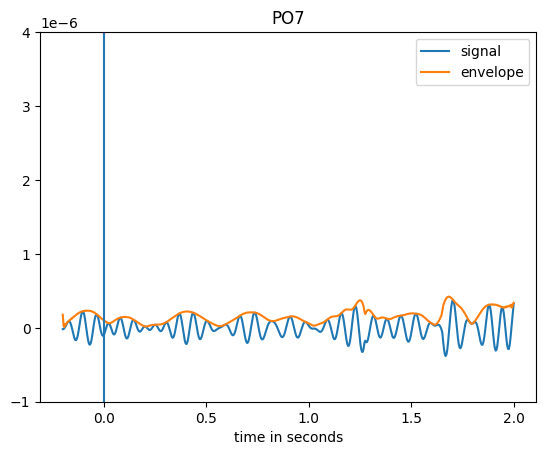

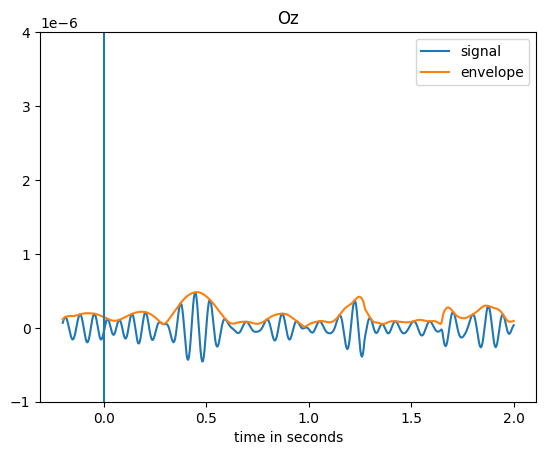

In [312]:
import matplotlib.pyplot as plt
from  scipy.signal import hilbert
signals = epochs_ssvep.average().get_data()
signals.shape
t = np.linspace(-0.2, 2, 551)

for idx, i in enumerate(signals[:-1]):
    j = hilbert(i)
    j_envelope = np.abs(j)
    # print(i.shape)
    fig, ax0 = plt.subplots()
    ax0.plot(t, i, label='signal')
    ax0.plot(t, j_envelope, label='envelope')
    ax0.set_xlabel("time in seconds")
    ax0.set_ylim([-1e-6, 4e-6])
    ax0.legend()
    plt.axvline(x=0)
    plt.title(f"{raw.info.ch_names[idx]}")
    plt.show()

Using data from preloaded Raw for 5 events and 551 original time points ...


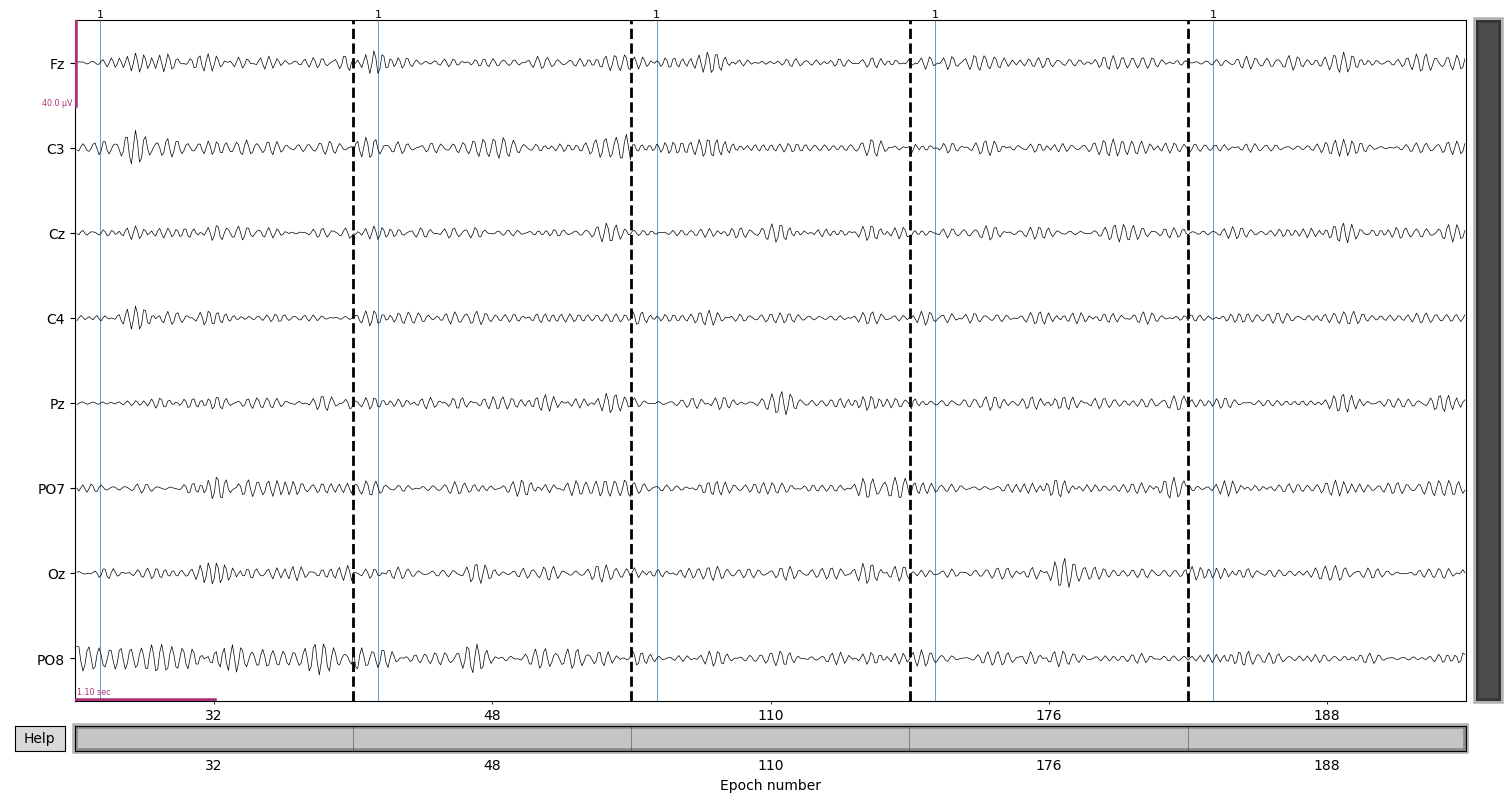

In [313]:
# plotting only events 1 and 2

event_1_2_ssvep = mne.pick_events(events_ssvep, include=[1])

_ = epochs_ssvep['1'].plot(events=event_1_2_ssvep)

In [314]:
epochs_ssvep.get_data()
dropped_epochs = [n for n, dl in enumerate(epochs_ssvep.drop_log) if len(dl)]  # result is a list
# np.nonzero(map(len, epochs.drop_log)) 
print(dropped_epochs)

Using data from preloaded Raw for 225 events and 551 original time points ...
0 bad epochs dropped
[]


### Plotting the average SSVEP at electrode Oz across all subjects for each sub speller. Band pass filter set to [11 Hz , 17 Hz]

In [315]:

event_subgroup1 = np.where((events_ssvep[:,2] > 0) & (events_ssvep[:,2] <= 9))
signal_subgroup1 = epochs_ssvep.get_data()[event_subgroup1[0]][:,6].mean(axis=0)

event_subgroup2 = np.where((events_ssvep[:,2] > 9) & (events_ssvep[:,2] <= 18))
signal_subgroup2 = epochs.get_data()[event_subgroup2[0]][:,6].mean(axis=0)

event_subgroup3 = np.where((events_ssvep[:,2] > 18) & (events_ssvep[:,2] <= 27))
signal_subgroup3 = epochs_ssvep.get_data()[event_subgroup3[0]][:,6].mean(axis=0)

event_subgroup4 = np.where((events_ssvep[:,2] > 27) & (events_ssvep[:,2] <= 33))
signal_subgroup4 = epochs_ssvep.get_data()[event_subgroup4[0]][:,6].mean(axis=0)

event_subgroup5 = np.where((events_ssvep[:,2] > 33) & (events_ssvep[:,2] <= 39))
signal_subgroup5 = epochs_ssvep.get_data()[event_subgroup5[0]][:,6].mean(axis=0)

event_subgroup6 = np.where((events_ssvep[:,2] > 39) & (events_ssvep[:,2] <= 45))
signal_subgroup6 = epochs_ssvep.get_data()[event_subgroup6[0]][:,6].mean(axis=0)

Using data from preloaded Raw for 225 events and 551 original time points ...
Using data from preloaded Raw for 225 events and 551 original time points ...
Using data from preloaded Raw for 225 events and 551 original time points ...
Using data from preloaded Raw for 225 events and 551 original time points ...
Using data from preloaded Raw for 225 events and 551 original time points ...
Using data from preloaded Raw for 225 events and 551 original time points ...


In [316]:
signals = np.concatenate([signal_subgroup1.reshape(1,-1), signal_subgroup2.reshape(1,-1), signal_subgroup3.reshape(1,-1), signal_subgroup3.reshape(1,-1), signal_subgroup4.reshape(1,-1), signal_subgroup5.reshape(1,-1)], axis=0)
signals.shape

(6, 551)

In [317]:
max_time = signals[1].size/250
timesteps = np.linspace(0,max_time,signals[1].size)
timesteps_list = [round(x, 3) for x in timesteps]
# print(max_time)
# print(timesteps_list)

In [318]:
# import matplotlib.pyplot as plt

# f = plt.figure(figsize=(19, 500))
# h = plt.matshow(signals, aspect = 'auto'
# , vmin = -2e-6, vmax = 2e-6)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Signal Plot', fontsize=16)
# plt.show()

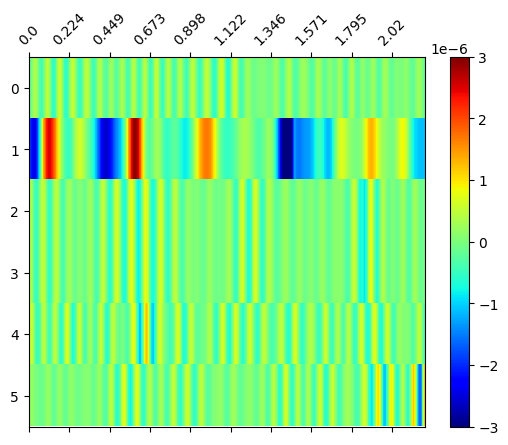

In [333]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(signals, aspect = 'auto', vmin = -3e-6, vmax = 3e-6)
fig.colorbar(cax)
# ax.set_xticklabels(timesteps_list)
cax.set_cmap('jet')
ax.set_xticks(np.arange(signals[1].size), timesteps_list)
ax.locator_params(axis="x", nbins=10)
ax.tick_params(axis='x', rotation=45)

plt.show()

### ERP variations of different sub-spellers , band pass filter 1Hz - 10Hz 

In [320]:
epochs.get_data()
dropped_epochs_erp = [n for n, dl in enumerate(epochs.drop_log) if len(dl)]  # result is a list
# np.nonzero(map(len, epochs.drop_log)) 
print(dropped_epochs_erp)

Using data from preloaded Raw for 225 events and 551 original time points ...
[]


In [321]:
event_subgroup1_erp = np.where((events[:,2] > 0) & (events[:,2] <= 9))
signal_subgroup1_erp = epochs.get_data()[event_subgroup1_erp[0]].mean(axis=0)

event_subgroup2_erp = np.where((events[:,2] > 9) & (events[:,2] <= 18))
signal_subgroup2_erp = epochs.get_data()[event_subgroup2_erp[0]].mean(axis=0)

event_subgroup3_erp = np.where((events[:,2] > 18) & (events[:,2] <= 27))
signal_subgroup3_erp = epochs.get_data()[event_subgroup3_erp[0]].mean(axis=0)

event_subgroup4_erp = np.where((events[:,2] > 27) & (events[:,2] <= 33))
signal_subgroup4_erp = epochs.get_data()[event_subgroup4_erp[0]].mean(axis=0)

event_subgroup5_erp = np.where((events[:,2] > 33) & (events[:,2] <= 39))
signal_subgroup5_erp = epochs.get_data()[event_subgroup5_erp[0]].mean(axis=0)

event_subgroup6_erp = np.where((events[:,2] > 39) & (events[:,2] <= 45))
signal_subgroup6_erp = epochs.get_data()[event_subgroup6_erp[0]].mean(axis=0)

Using data from preloaded Raw for 225 events and 551 original time points ...
Using data from preloaded Raw for 225 events and 551 original time points ...
Using data from preloaded Raw for 225 events and 551 original time points ...
Using data from preloaded Raw for 225 events and 551 original time points ...
Using data from preloaded Raw for 225 events and 551 original time points ...
Using data from preloaded Raw for 225 events and 551 original time points ...


In [322]:
signals.shape

(6, 551)

In [323]:
signal_subgroup1_erp.shape

(9, 551)

In [324]:
signal_subgroup1_erp.reshape(1,-1).shape

(1, 4959)

In [325]:
signal_subgroup1.shape

(551,)

In [326]:
signal_subgroup1.reshape(1,-1).shape

(1, 551)

In [327]:
signals_erp = np.dstack((signal_subgroup1_erp, signal_subgroup2_erp, signal_subgroup3_erp, signal_subgroup4_erp, signal_subgroup5_erp, signal_subgroup6_erp))
signals_erp = np.swapaxes(signals_erp, 2, 1)
signals_erp.shape

(9, 6, 551)

In [328]:
# import matplotlib.pyplot as plt
# from  scipy.signal import hilbert


# for idx, i in enumerate(signals_erp[:-1]):
#     f = plt.figure(figsize=(19, 500))
#     plt.matshow(i, aspect = 'auto', vmin = -3e-6, vmax = 3e-6)
#     cb = plt.colorbar()
#     cb.ax.tick_params(labelsize=14)
#     plt.title(f"{raw.info.ch_names[idx]}")
#     plt.show()

(551,)


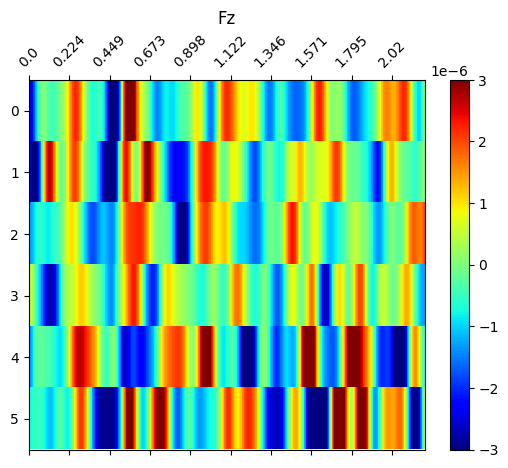

(551,)


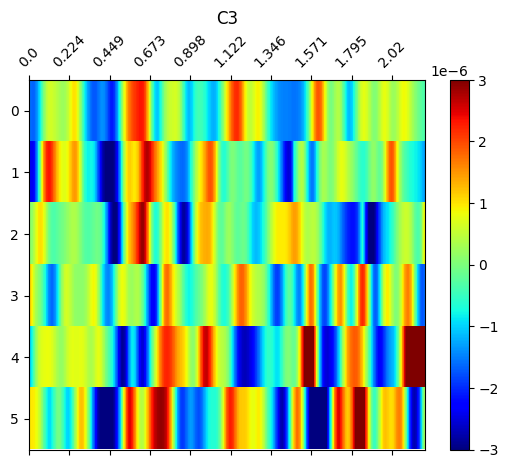

(551,)


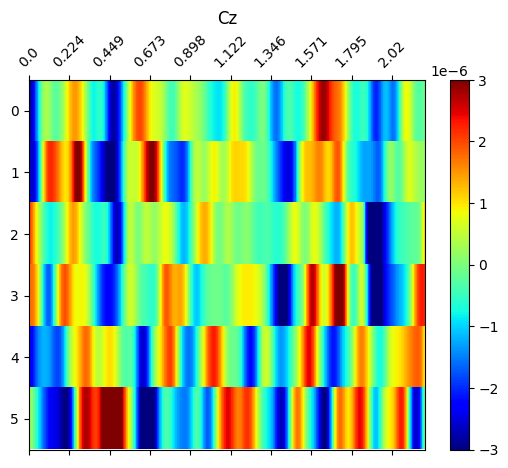

(551,)


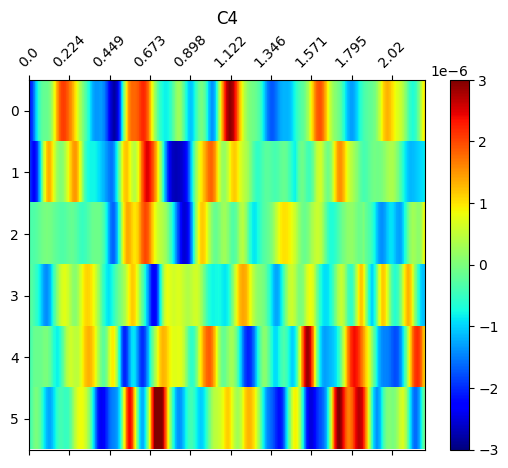

(551,)


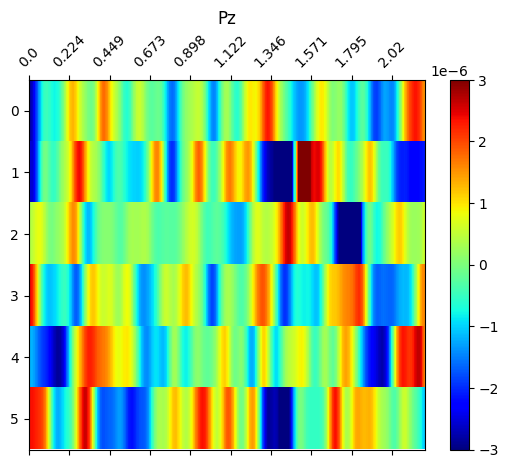

(551,)


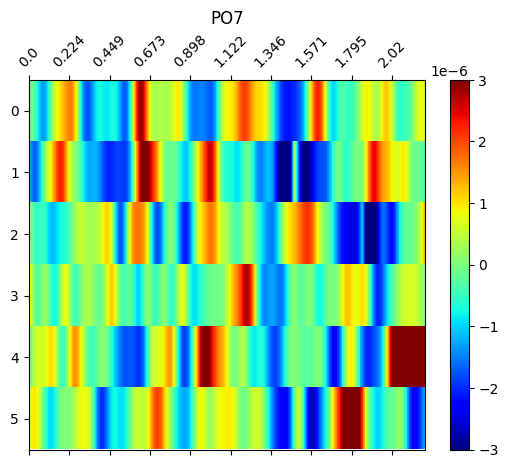

(551,)


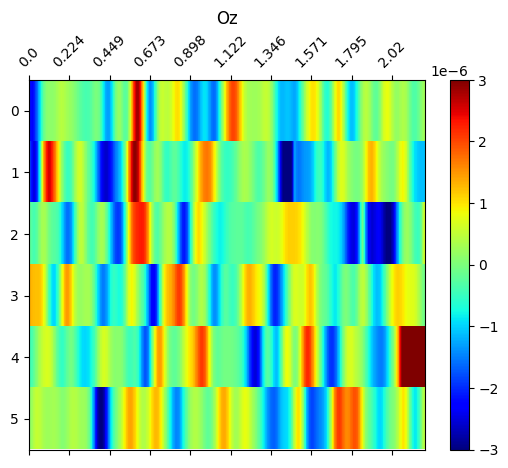

(551,)


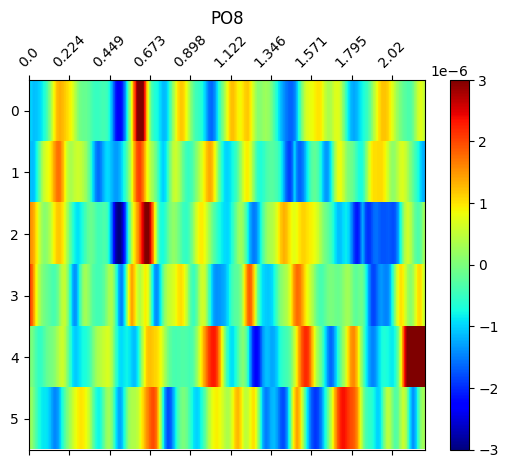

In [332]:
import matplotlib.pyplot as plt
from  scipy.signal import hilbert

# for idx, i in enumerate(signals_erp[:-1]):


for idx, i in enumerate(signals_erp[:-1]):
    print(i[1].shape)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(i, aspect = 'auto', vmin = -3e-6, vmax = 3e-6)
    fig.colorbar(cax)
    cax.set_cmap('jet')
    # ax.set_xticklabels(timesteps_list)

    ax.set_xticks(np.arange(i[1].size), timesteps_list)
    ax.locator_params(axis="x", nbins=10)
    ax.tick_params(axis='x', rotation=45)
    plt.title(f"{raw.info.ch_names[idx]}")
    plt.show()